<a href="https://colab.research.google.com/github/ua-datalab/NLP-Speech/blob/main/Introduction_to_transformers/training_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Transformers

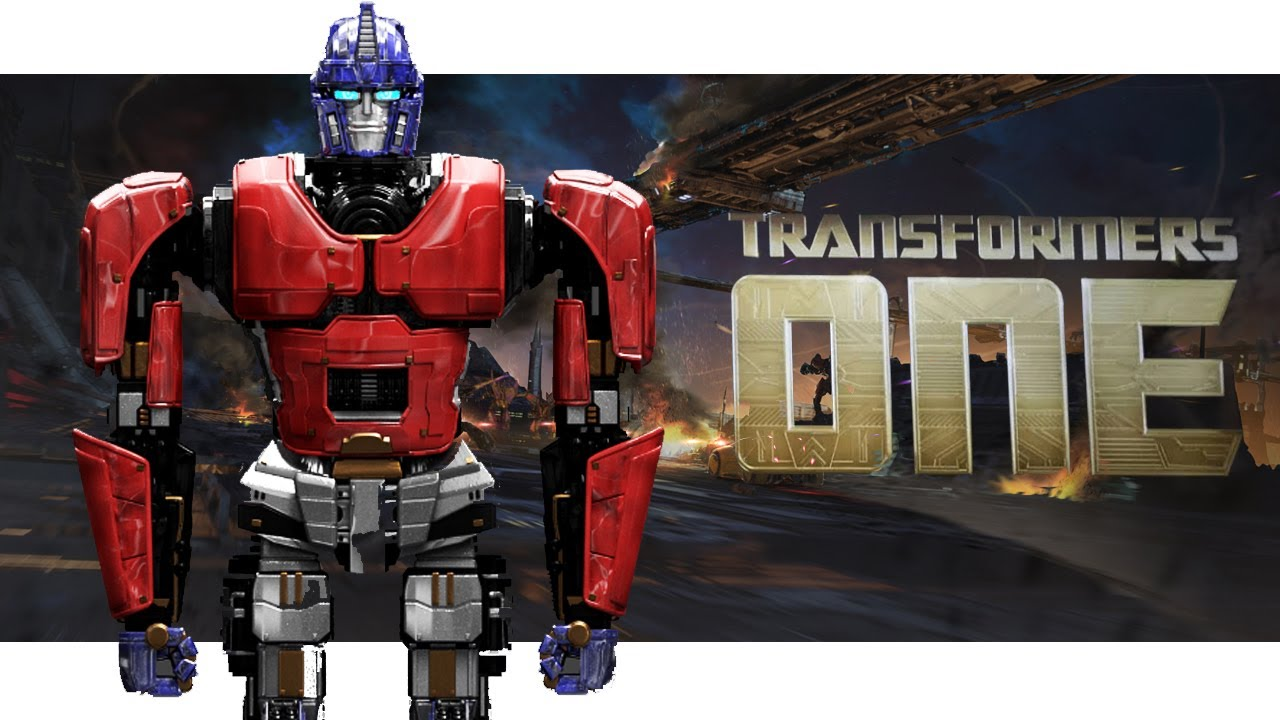


## Slide deck: https://docs.google.com/presentation/d/1mL4ygUlKjNWPSqCiG9GqIQ4iCATj_JuGYfv0xw6VEvM/edit?usp=sharing




# Let’s train some transformers:

In [ ]:
pip install transformers

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
    ]
)

In [ ]:
tokenized_text = "This movie was really scary".split()
print(tokenized_text)

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

In [ ]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

In [ ]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

In [ ]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)

In [ ]:
print(outputs.logits.shape)
print(outputs.logits)

In [ ]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)


In [ ]:
model.config.id2label

In [ ]:
out=predictions.tolist()

print(raw_inputs)
for i,row in enumerate(out):
  index=row.index(max(row))
  print(model.config.id2label[index])
